In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
'''
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
'''
#1. Create a pie chart presenting the male/female proportion

'\nThis assignment is for visualization using matplotlib:\ndata to use:\nurl=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv\ntitanic = pd.read_csv(url)\nCharts to plot:\n'

In [31]:
count=df['sex'].value_counts()
count
labels=count.index
labels

Index(['male', 'female'], dtype='object')

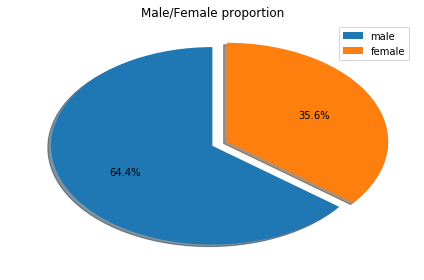

In [6]:
count=df['sex'].value_counts()
labels=count.index
explode =(0,0.1)
fig, ax1 = plt.subplots(1, 1)
ax1.pie(count,startangle=90,explode=explode,autopct='%.1f%%',shadow=True)
ax1.legend(labels, loc=1) 
plt.title('Male/Female proportion')
plt.tight_layout()

In [7]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Text(0,0.5,'Fare')

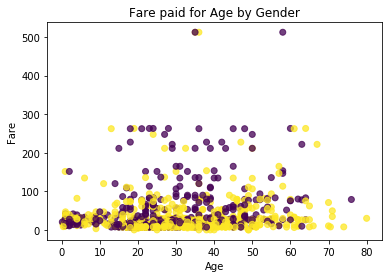

In [34]:
df = df.dropna(subset=['sex'])
c=pd.factorize(df['sex'])
#mapping = {'male':'blue', 'female':'yellow'}
#label=mapping.keys()
fig, ax2 = plt.subplots()
ax2.scatter(x='age',y='fare',data=df, alpha=0.75,c=c[0])
#ax2.legend(handles=ax2.legend_elements()[0], loc='best') 
plt.title('Fare paid for Age by Gender')
plt.xlabel('Age')
plt.ylabel('Fare')
#plt.tight_layout()

In [18]:
'''
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
'''

'\nWe have the min and max temperatures in a city In India for each months of the year.\nWe would like to find a function to describe this and show it graphically, the dataset\ngiven below.\nTask:\n1. fitting it to the periodic function\n2. plot the fit\nData\nMax = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25\nMin = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18\n'

In [20]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0,0.5,'Min and max temperature')

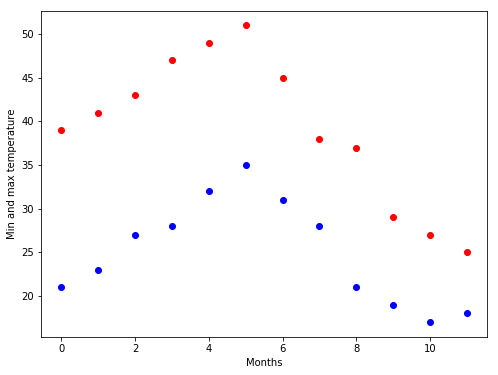

In [21]:
months = np.arange(12)
plt.figure(figsize=(8,6))
plt.plot(months, max_temp, 'ro')
plt.plot(months, min_temp, 'bo')
plt.xlabel('Months')
plt.ylabel('Min and max temperature')

In [23]:
from scipy import optimize
def yearly_temp(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp, months,
                                      max_temp, [40,20,0])
res_min, cov_min = optimize.curve_fit(yearly_temp, months,
                                      min_temp, [-40, 20, 0])


Text(0,0.5,'Temperature ($^\\circ$C)')

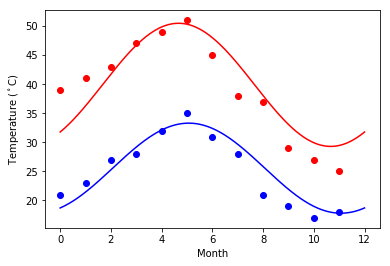

In [27]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temp(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temp(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

